In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
%matplotlib inline

Problem #1: Train and test scores are matched. So no overfitting and no outliers. We try polynomial features and get a much better score. Still, with all the extra features, overfitting is a risk. So we do LassoCV, to a get a model that minimizes errors while keeping the model as simple as possible.

In [36]:
df = pd.read_csv('data/1.csv')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2','x3','x4','x5']], df['y'], test_size=0.33, random_state=42)

In [38]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.8121064765049768

In [39]:
m.score(X_test,y_test)

0.82136801041477181

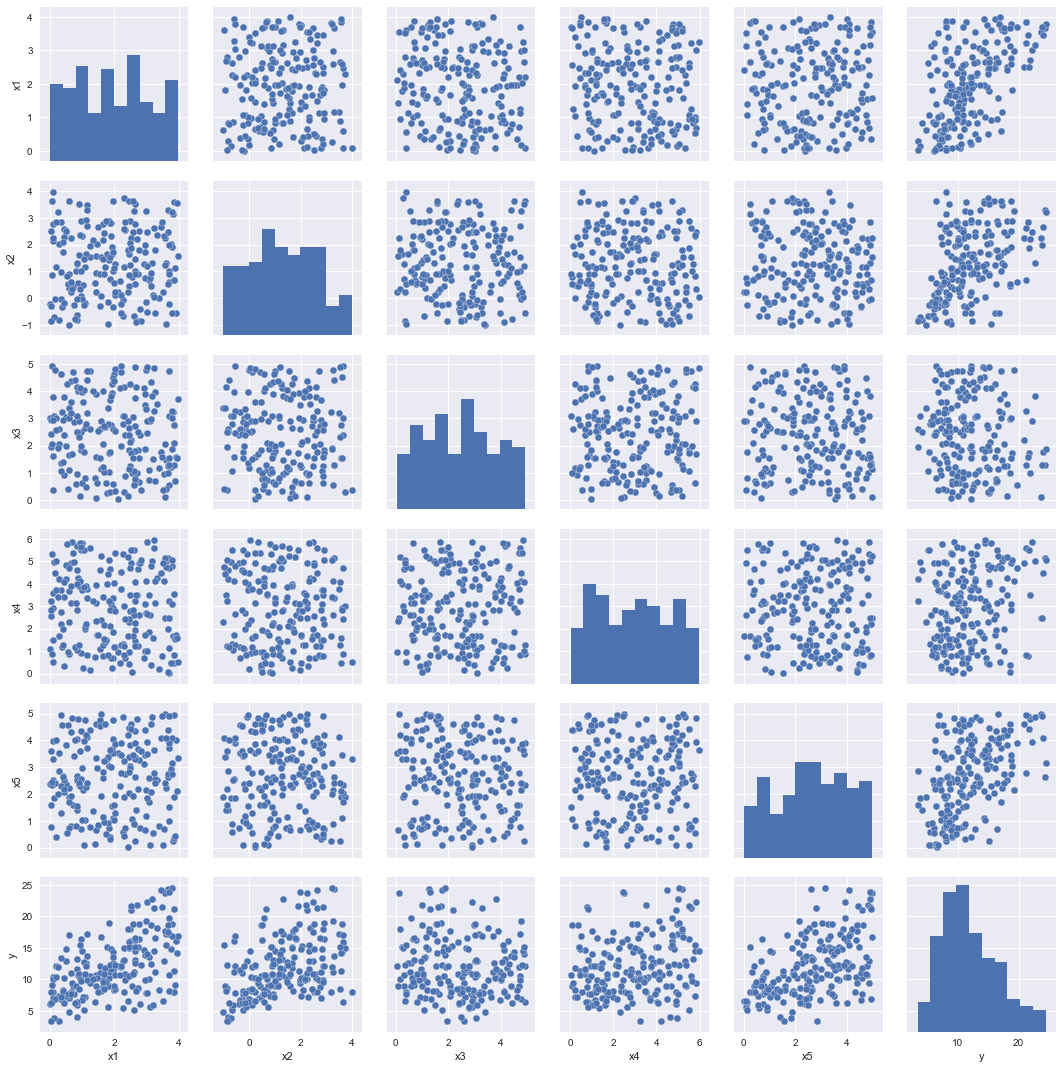

In [40]:
sns.pairplot(df)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.fit_transform(X_train),y_train)

0.96750413145385128

In [42]:
m.score(p.transform(X_test),y_test)

0.96861425543730162

In [8]:
m.coef_

array([  0.00000000e+00,  -9.04782196e-01,  -3.55734982e-01,
        -6.60111647e-01,  -1.24455121e-01,  -2.80234329e-01,
         1.00834501e-01,   5.06746448e-02,   7.29243558e-02,
        -9.44492810e-03,   9.03730457e-01,  -5.95261904e-03,
         6.67785540e-03,   6.33196014e-01,   2.47220885e-02,
         1.03353806e-01,  -1.77498045e-02,  -2.09742585e-02,
         6.15803252e-03,   3.95335494e-02,   2.99065736e-04])

In [43]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [44]:
m = LassoCV()
m.fit(p.fit_transform(X_train),y_train)
m.score(p.fit_transform(X_train),y_train)

0.96367525361716377

In [45]:
m.score(p.transform(X_test),y_test)

0.97233258496069419

In [46]:
m.coef_

array([ 0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.80619988, -0.        , -0.        ,  0.57643446,  0.        ,
       -0.        , -0.00538609, -0.01620364,  0.00363076,  0.01160356,  0.        ])

Problem #2: The pairplots show that there are two different trends depending on x1 being greater than less than 2. In this case, we can break up the problem into two subproblems, or we can introduce a categorical variable which is 0/1 based on x1>2. Then we need to interact this variable with x1.

In [54]:
df = pd.read_csv('data/2.csv')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33, random_state=42)

In [56]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.93021560460122987

In [57]:
m.score(X_test,y_test)

0.90337459515838447

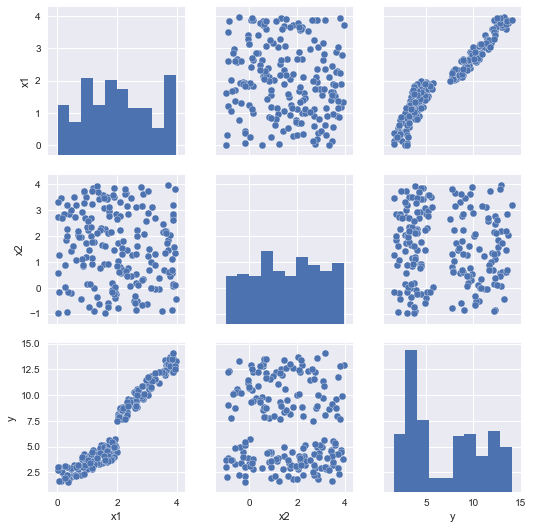

In [58]:
sns.pairplot(df)

In [62]:
df['x3'] = df['x1']*(df['x1'] > 2)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2','x3']], df['y'], test_size=0.33, random_state=42)

In [64]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.98158989868474567

In [65]:
m.score(X_test,y_test)

0.97127428867549415

Problem #3: Here too polynomial features help. But in this case, we have column names. And it's good to use domain knowledge and try to figure out the relationship between each feature and the target. Here, we have volume of the water tank, but the size of the shadow depends on the surface area. So we could do the square of the cuberoot. Also, the the length of the shadow might depend on the cosine of the sun's angle. So we'll generate two features.

In [22]:
df = pd.read_csv('data/3.csv')
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33, random_state=42)

In [24]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.0042436889563588487

In [26]:
m = LinearRegression()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.fit_transform(X_train),y_train)

0.78954723635262092

In [27]:
df['x3'] = df['x1']**(2/3)
df['x4'] = np.abs(np.cos(np.pi*df['x2']/180))
X_train, X_test, y_train, y_test = train_test_split(df[['x3','x4']], df['y'], test_size=0.33, random_state=42)

In [28]:
m = LinearRegression()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.fit_transform(X_train),y_train)

1.0

In [29]:
m.score(p.fit_transform(X_test),y_test)

1.0

Problem #4: In this, we first leave out the column of names. After we model, we can use the residuals to see which datapoints we are most over-predicting and most-underpredicting. Observing that might help us discover new features. In this case, we realize that 'vintage' and 'damaged' tags in the names are meaningful and we isolate them into new features.

In [78]:
df = pd.read_csv('data/4.csv')

In [79]:
m = LinearRegression()

In [80]:
m.fit(df[['x2','x3']],df['y'])
m.score(df[['x2','x3']],df['y'])

0.013759300582428136

In [81]:
df['res'] = m.predict(df[['x2','x3']])-df['y']

In [82]:
df.sort_values(['res']).head()

,x1,x2,x3,y,res
101,Jackson-vintage,0.358692,0.520527,50.879219,-52.394710
34,Madison-vintage,1.682891,0.120268,51.803159,-51.487826
94,Camilla-vintage,1.076027,0.553542,51.629568,-51.484782
180,Peyton-vintage,0.636186,1.044468,51.680654,-51.186143
44,Avery-vintage,1.408077,0.594852,52.002929,-51.019966


In [83]:
df.sort_values(['res']).tail()

,x1,x2,x3,y,res
60,Nora-damaged,3.079582,3.738812,-43.181606,56.239758
178,Mackenzie-damaged,3.519826,3.468772,-43.011402,56.311741
127,Benjamin-damaged,2.625497,4.631148,-42.743354,57.194073
149,William-damaged,3.918144,4.065242,-42.016613,57.785792
106,Ava-damaged,3.733549,4.267993,-41.998458,57.905623


In [84]:
df['x4'] = df.apply(lambda x: 'vintage' in x.x1,axis=1)
df['x5'] = df.apply(lambda x: 'damaged' in x.x1,axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df[['x2','x3','x4','x5']], df['y'], test_size=0.33, random_state=42)

In [86]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

1.0

In [87]:
m.score(X_test,y_test)

1.0